<strong>Cargar Dataset</strong>

In [60]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline
#url = 'pd_speech_features.csv'
#df = pd.read_table(url,sep=",")
#df.head()
url = 'owid-covid-data.csv'
df1 = pd.read_table(url , sep=",")
df1.head(31916)


,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31910,NaN,NaN,International,2020-02-28,705.0,0.0,4.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31911,NaN,NaN,International,2020-02-29,705.0,0.0,6.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31912,NaN,NaN,International,2020-03-01,705.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31913,NaN,NaN,International,2020-03-02,705.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<strong>Limpiar Ruido:</strong>

In [61]:
missing_data = df1.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print('')
    

iso_code
False    31851
True        64
Name: iso_code, dtype: int64

continent
False    31646
True       269
Name: continent, dtype: int64

location
False    31915
Name: location, dtype: int64

date
False    31915
Name: date, dtype: int64

total_cases
False    31592
True       323
Name: total_cases, dtype: int64

new_cases
False    31592
True       323
Name: new_cases, dtype: int64

total_deaths
False    31592
True       323
Name: total_deaths, dtype: int64

new_deaths
False    31592
True       323
Name: new_deaths, dtype: int64

total_cases_per_million
False    31528
True       387
Name: total_cases_per_million, dtype: int64

new_cases_per_million
False    31528
True       387
Name: new_cases_per_million, dtype: int64

total_deaths_per_million
False    31528
True       387
Name: total_deaths_per_million, dtype: int64

new_deaths_per_million
False    31528
True       387
Name: new_deaths_per_million, dtype: int64

total_tests
True     21928
False     9987
Name: total_tests, dtype: int6

In [62]:
import numpy as np
df1.replace("?", np.nan, inplace = True)
df1.dropna(subset=['iso_code'], axis = 0, inplace= True)
df1.dropna(subset=['continent'], axis = 0, inplace= True)
df1.dropna(subset=['location'], axis = 0, inplace= True)
df1.dropna(subset=['date'], axis = 0, inplace= True)
df1.dropna(subset=['total_cases'], axis = 0, inplace= True)
df1.dropna(subset=['new_cases'], axis = 0, inplace= True)
df1.dropna(subset=['total_deaths'], axis = 0, inplace= True)
df1.dropna(subset=['new_deaths'], axis = 0, inplace= True)
df1.dropna(subset=['total_cases_per_million'], axis = 0, inplace= True)
df1.dropna(subset=['new_cases_per_million'], axis = 0, inplace= True)

df1.dropna(subset=['total_deaths_per_million'], axis = 0, inplace= True)
df1.dropna(subset=['new_deaths_per_million'], axis = 0, inplace= True)
df1.dropna(subset=['total_tests'], axis = 0, inplace= True)
df1.dropna(subset=['new_tests'], axis = 0, inplace= True)
df1.dropna(subset=['total_tests_per_thousand'], axis = 0, inplace= True)
df1.dropna(subset=['new_tests_per_thousand'], axis = 0, inplace= True)
df1.dropna(subset=['new_tests_smoothed'], axis = 0, inplace= True)
df1.dropna(subset=['new_tests_smoothed_per_thousand'], axis = 0, inplace= True)
df1.dropna(subset=['tests_units'], axis = 0, inplace= True)
df1.dropna(subset=['stringency_index'], axis = 0, inplace= True)
df1.dropna(subset=['population'], axis = 0, inplace= True)
df1.dropna(subset=['population_density'], axis = 0, inplace= True)
df1.dropna(subset=['median_age'], axis = 0, inplace= True)
df1.dropna(subset=['aged_65_older'], axis = 0, inplace= True)

df1.dropna(subset=['aged_70_older'], axis = 0, inplace= True)
df1.dropna(subset=['gdp_per_capita'], axis = 0, inplace= True)
df1.dropna(subset=['extreme_poverty'], axis = 0, inplace= True)
df1.dropna(subset=['cardiovasc_death_rate'], axis = 0, inplace= True)
df1.dropna(subset=['diabetes_prevalence'], axis = 0, inplace= True)
df1.dropna(subset=['female_smokers'], axis = 0, inplace= True)
df1.dropna(subset=['male_smokers'], axis = 0, inplace= True)
df1.dropna(subset=['handwashing_facilities'], axis = 0, inplace= True)
df1.dropna(subset=['hospital_beds_per_thousand'], axis = 0, inplace= True)
df1.dropna(subset=['life_expectancy'], axis = 0, inplace= True)

df1.reset_index(drop = True, inplace = True)
df1.head(2116)


,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,BGD,Asia,Bangladesh,2020-03-15,3.0,0.0,0.0,0.0,0.018,0.000,...,3.262,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8,72.59
1,BGD,Asia,Bangladesh,2020-03-17,5.0,2.0,0.0,0.0,0.030,0.012,...,3.262,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8,72.59
2,BGD,Asia,Bangladesh,2020-03-18,8.0,3.0,0.0,0.0,0.049,0.018,...,3.262,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8,72.59
3,BGD,Asia,Bangladesh,2020-03-19,10.0,2.0,0.0,0.0,0.061,0.012,...,3.262,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8,72.59
4,BGD,Asia,Bangladesh,2020-03-20,10.0,0.0,0.0,0.0,0.061,0.000,...,3.262,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8,72.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2111,ZWE,Africa,Zimbabwe,2020-07-13,985.0,3.0,18.0,0.0,66.272,0.202,...,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49
2112,ZWE,Africa,Zimbabwe,2020-07-14,1034.0,49.0,19.0,1.0,69.569,3.297,...,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49
2113,ZWE,Africa,Zimbabwe,2020-07-15,1034.0,0.0,19.0,0.0,69.569,0.000,...,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49
2114,ZWE,Africa,Zimbabwe,2020-07-16,1089.0,55.0,20.0,1.0,73.270,3.700,...,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49


<strong>groupby por localizacion </strong>

In [63]:
df1= df1.groupby(['location']).mean()
df1= round(df1,5)
df1


,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
location,,,,,,,,,,,,,,,,,,,,,
Bangladesh,49360.56557,1557.81967,659.01639,19.86885,299.71918,9.45913,4.00151,0.12068,2.907094e+05,8033.90164,...,3.262,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.80,72.59
Colombia,31192.26829,1223.10569,1068.62602,43.14634,613.02084,24.03767,21.00171,0.84799,2.901533e+05,8579.83740,...,4.312,13254.949,4.5,124.240,7.44,4.7,13.5,65.386,1.71,77.29
Costa Rica,1458.45763,64.02542,8.67797,0.25424,286.30253,12.56855,1.70364,0.04988,1.648024e+04,413.51695,...,5.694,15524.995,1.3,137.973,8.78,6.4,17.4,83.841,1.13,80.28
Ecuador,32213.94000,512.58000,2480.77000,45.21000,1825.87033,29.05278,140.60885,2.56245,6.106910e+04,1298.52000,...,4.458,10581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.50,77.01
El Salvador,3447.89247,118.79570,84.44086,3.41935,531.57347,18.31514,13.01849,0.52715,9.995381e+04,2152.46237,...,5.417,7292.458,2.2,167.295,8.87,2.5,18.8,90.650,1.30,73.32
Ethiopia,1703.51020,77.30612,26.44898,1.42857,14.81782,0.67241,0.22994,0.01241,1.042243e+05,3148.61224,...,2.063,1729.927,26.7,182.634,7.47,0.4,8.5,7.960,0.30,66.60
Ghana,11463.11765,298.33824,62.73529,1.60294,368.90996,9.60128,2.01896,0.05157,2.382313e+05,3422.69118,...,1.948,4227.630,12.0,298.245,4.97,0.3,7.7,41.047,0.90,64.07
India,204858.10891,7787.65347,6085.48515,211.74257,148.44738,5.64323,4.40981,0.15342,3.517726e+06,107815.96040,...,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.550,0.53,69.66
Indonesia,23593.31633,640.46939,1362.26531,31.66327,86.25693,2.34155,4.98042,0.11573,1.974535e+05,5344.74490,...,3.053,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72


<strong>transformar variables categóricas en numéricas</strong>

In [64]:
#Seleccionamos las variables escogidas
#	iso_code	continent	date	total_cases	new_cases	total_deaths	new_deaths	total_cases_per_million	new_cases_per_million	total_deaths_per_million	...	aged_70_older	gdp_per_capita	extreme_poverty	cardiovasc_death_rate	diabetes_prevalence	female_smokers	male_smokers	handwashing_facilities	hospital_beds_per_thousand	life_expectancy
Xsubset = df1[['total_cases','total_deaths','new_deaths','total_cases_per_million','new_cases_per_million','total_deaths_per_million','new_deaths_per_million','total_tests_per_thousand','new_tests_per_thousand','new_tests_smoothed','new_tests_smoothed_per_thousand','stringency_index','population','population_density','median_age','aged_65_older'
             ,'aged_70_older','gdp_per_capita','extreme_poverty','cardiovasc_death_rate','diabetes_prevalence','female_smokers','male_smokers','handwashing_facilities','hospital_beds_per_thousand','life_expectancy','new_cases']]
#Xsubset = df[['Pclass', 'Sex', 'Embarked']]
#Xsubset.fillna(0)

#para separar nuestra variable dependiente de la independiente, haremos lo siguiente:
y = df1.new_cases.values
print(Xsubset)
type(Xsubset)

               total_cases  total_deaths  new_deaths  total_cases_per_million  \
location                                                                        
Bangladesh     49360.56557     659.01639    19.86885                299.71918   
Colombia       31192.26829    1068.62602    43.14634                613.02084   
Costa Rica      1458.45763       8.67797     0.25424                286.30253   
Ecuador        32213.94000    2480.77000    45.21000               1825.87033   
El Salvador     3447.89247      84.44086     3.41935                531.57347   
Ethiopia        1703.51020      26.44898     1.42857                 14.81782   
Ghana          11463.11765      62.73529     1.60294                368.90996   
India         204858.10891    6085.48515   211.74257                148.44738   
Indonesia      23593.31633    1362.26531    31.66327                 86.25693   
Kazakhstan     12334.42735      67.83761     3.20513                656.90045   
Kenya           2565.42391  

pandas.core.frame.DataFrame

In [65]:

preprocesador1 = make_column_transformer(
    (StandardScaler(),['total_cases','total_deaths','new_deaths','total_cases_per_million','new_cases_per_million','total_deaths_per_million','new_deaths_per_million','total_tests_per_thousand','new_tests_per_thousand','new_tests_smoothed','new_tests_smoothed_per_thousand','stringency_index','population','population_density','median_age','aged_65_older'
             ,'aged_70_older','gdp_per_capita','extreme_poverty','cardiovasc_death_rate','diabetes_prevalence','female_smokers','male_smokers','handwashing_facilities','hospital_beds_per_thousand','life_expectancy','new_cases']))
X = preprocesador1.fit_transform(Xsubset)
print(X.shape[1])
print(X.shape)

#print(X)

print(preprocesador1)
cnamesDataset1 = ['total_cases','total_deaths','new_deaths','total_cases_per_million','new_cases_per_million','total_deaths_per_million','new_deaths_per_million','total_tests_per_thousand','new_tests_per_thousand','new_tests_smoothed','new_tests_smoothed_per_thousand','stringency_index','population','population_density','median_age','aged_65_older'
             ,'aged_70_older','gdp_per_capita','extreme_poverty','cardiovasc_death_rate','diabetes_prevalence','female_smokers','male_smokers','handwashing_facilities','hospital_beds_per_thousand','life_expectancy','new_cases']


DatasetPreprocesado = pd.DataFrame(data=X,columns=cnamesDataset1)


DatasetPreprocesado.to_csv("DatasetPreprocesadoCovid-19.csv", sep=";",index = False) #sep es el separado, por defector es ","
DatasetPreprocesado.head()

27
(21, 27)
ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('standardscaler',
                                 StandardScaler(copy=True, with_mean=True,
                                                with_std=True),
                                 ['total_cases', 'total_deaths', 'new_deaths',
                                  'total_cases_per_million',
                                  'new_cases_per_million',
                                  'total_deaths_per_million',
                                  'new_deaths_per_million',
                                  'total_tests_per_thousand...
                                  'new_tests_smoothed',
                                  'new_tests_smoothed_per_thousand',
                                  'stringency_index', 'population',
                                  'population_density', 'median_age',
                                  'a

,total_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,new_cases
0,0.492042,-0.189307,-0.183678,-0.069395,-0.071252,-0.301258,-0.349617,-0.442630,-0.421345,-0.063491,...,-0.812083,0.218050,0.533688,0.555738,-0.899863,0.841400,-0.965072,-0.527132,0.339012,0.374337
1,0.094401,0.025863,0.205630,0.698439,1.252691,0.250741,0.819380,0.071661,0.269882,-0.053903,...,0.869703,-0.584063,-1.398116,0.166997,0.434476,-0.919332,0.202691,0.162361,1.212425,0.177801
2,-0.556369,-0.530934,-0.511726,-0.102276,0.211128,-0.375871,-0.463413,-0.250618,-0.234281,-0.415607,...,1.262031,-0.833263,-1.245440,0.721160,1.047550,-0.699240,0.907481,-0.277096,1.768064,-0.502784
3,0.116762,0.767670,0.240144,3.670868,1.708136,4.134402,3.575011,-0.221063,-0.277875,-0.374310,...,0.407731,-0.654151,-1.217924,-0.614621,-0.539231,-0.987052,0.785045,0.003247,1.160391,-0.239403
4,-0.512827,-0.491135,-0.458791,0.498829,0.733002,-0.008476,0.303697,1.339775,1.210969,-0.333242,...,-0.160784,-0.763176,-0.919454,0.758380,-0.358915,-0.620233,1.167514,-0.148290,0.474669,-0.470625


<strong>Nuevo Dataset</strong>

In [66]:
import pandas as pd
url = 'DatasetPreprocesadoCovid-19.csv'
df = pd.read_table(url,sep=";")
df.head(21)


,total_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,new_cases
0,0.492042,-0.189307,-0.183678,-0.069395,-0.071252,-0.301258,-0.349617,-0.442630,-0.421345,-0.063491,...,-0.812083,2.180502e-01,0.533688,0.555738,-0.899863,0.841400,-0.965072,-0.527132,0.339012,0.374337
1,0.094401,0.025863,0.205630,0.698439,1.252691,0.250741,0.819380,0.071661,0.269882,-0.053903,...,0.869703,-5.840630e-01,-1.398116,0.166997,0.434476,-0.919332,0.202691,0.162361,1.212425,0.177801
2,-0.556369,-0.530934,-0.511726,-0.102276,0.211128,-0.375871,-0.463413,-0.250618,-0.234281,-0.415607,...,1.262031,-8.332633e-01,-1.245440,0.721160,1.047550,-0.699240,0.907481,-0.277096,1.768064,-0.502784
3,0.116762,0.767670,0.240144,3.670868,1.708136,4.134402,3.575011,-0.221063,-0.277875,-0.374310,...,0.407731,-6.541506e-01,-1.217924,-0.614621,-0.539231,-0.987052,0.785045,0.003247,1.160391,-0.239403
4,-0.512827,-0.491135,-0.458791,0.498829,0.733002,-0.008476,0.303697,1.339775,1.210969,-0.333242,...,-0.160784,-7.631757e-01,-0.919454,0.758380,-0.358915,-0.620233,1.167514,-0.148290,0.474669,-0.470625
5,-0.551005,-0.521598,-0.492086,-0.767626,-0.869214,-0.423722,-0.523638,-0.554784,-0.544690,-0.285004,...,-1.122147,1.144764e+00,-0.748923,0.179404,-1.116242,-1.201500,-1.990388,-0.905974,-0.774125,-0.494986
6,-0.337401,-0.502537,-0.489170,0.100176,-0.058343,-0.365632,-0.460697,0.328273,-0.067572,-0.289687,...,-0.690473,-1.383339e-16,0.536379,-0.854482,-1.152305,-1.246647,-0.726807,-0.451363,-1.244282,-0.365201
7,3.895341,2.661247,3.025347,-0.440129,-0.417792,-0.288001,-0.296995,-0.340236,-0.252157,4.353972,...,-0.310416,7.164506e-01,0.358888,1.386982,-0.575294,-0.518653,-0.020184,-0.731707,-0.205478,4.032352
8,-0.071914,0.180113,0.013580,-0.592544,-0.717632,-0.269473,-0.357573,-0.578916,-0.590418,-0.188065,...,0.512605,-4.906129e-01,1.032429,-0.296184,-0.250725,2.613418,0.157550,-0.345288,0.177337,-0.164310
9,-0.318331,-0.499857,-0.462374,0.805978,1.618006,-0.313878,-0.269157,3.952723,3.920576,0.262248,...,2.736360,-9.267133e-01,2.410194,0.030524,1.263930,0.751106,1.486359,3.943206,0.526702,-0.231007


<strong>Descripcion Estadistica</strong>

In [67]:
type(df)
df = df.iloc[1:]
df.describe()


,total_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,new_cases
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,-0.024602,0.009465,0.009184,0.003470,0.003563,0.015063,0.017481,0.022132,0.021067,0.003175,...,0.040604,-0.010903,-0.026684,-0.027787,0.044993,-0.042070,0.048254,0.026357,-0.016951,-0.018717
std,1.044932,1.050373,1.050428,1.051188,1.051182,1.048927,1.048097,1.046153,1.046639,1.051209,...,1.033837,1.050065,1.043802,1.043166,1.029812,1.032540,1.026544,1.043986,1.048290,1.047626
min,-0.584594,-0.535492,-0.515978,-0.799690,-0.925666,-0.431188,-0.543585,-0.580640,-0.592782,-0.419675,...,-1.174015,-0.926713,-1.398116,-2.157178,-1.152305,-1.246647,-1.990388,-0.905974,-1.807354,-0.538498
25%,-0.567206,-0.530770,-0.511834,-0.694244,-0.810687,-0.401309,-0.518543,-0.488706,-0.518524,-0.388801,...,-0.743817,-0.767069,-0.791555,-0.617722,-0.836752,-0.744387,-0.642427,-0.489248,-0.760188,-0.524510
50%,-0.510609,-0.501517,-0.487849,-0.460282,-0.463268,-0.340145,-0.462055,-0.333065,-0.308178,-0.307139,...,-0.235600,-0.537338,-0.199531,0.061541,-0.304820,-0.467862,0.180121,-0.148290,0.089996,-0.465795
75%,0.099991,0.064426,0.090589,0.369665,0.415870,-0.151109,-0.085126,-0.065422,-0.059182,-0.154524,...,0.560397,0.582116,0.563063,0.560908,1.020503,0.405449,0.815654,0.156678,0.812420,-0.078782
max,3.895341,3.107080,3.025347,3.670868,2.589401,4.134402,3.575011,3.952723,3.920576,4.353972,...,2.736360,2.896953,2.410194,2.491173,2.165510,2.613418,1.486359,3.943206,1.768064,4.032352


<strong>Estandarizacion</strong>

In [68]:
#proceso de estandar
# StandardScaler to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms.
from sklearn.preprocessing import StandardScaler
features =['total_cases','new_cases','total_deaths','new_deaths','total_cases_per_million','new_cases_per_million','total_deaths_per_million','new_deaths_per_million','total_tests_per_thousand','new_tests_per_thousand','new_tests_smoothed','new_tests_smoothed_per_thousand','stringency_index','population','population_density','median_age','aged_65_older'
             ,'aged_70_older','gdp_per_capita','extreme_poverty','cardiovasc_death_rate','diabetes_prevalence','female_smokers','male_smokers','handwashing_facilities','hospital_beds_per_thousand','life_expectancy']
x = df.loc[:, features].values
#Separando la target
y = df.loc[:,['new_cases']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
print(x)

[[ 1.16844440e-01  1.92456987e-01  1.60169363e-02  1.91873736e-01
   6.78302059e-01  1.21917936e+00  2.30521543e-01  7.84975399e-01
   4.85747509e-02  2.43902998e-01 -5.57073370e-02  2.12158388e-01
   5.40310734e-01 -2.64938538e-01 -7.94915604e-01  1.17113345e+00
   9.59788386e-01  6.39578218e-01  8.22797002e-01 -5.60013445e-01
  -1.34801331e+00  1.91574737e-01  3.88032579e-01 -8.71686769e-01
   1.54351886e-01  1.33658375e-01  1.20320934e+00]
 [-5.22120767e-01 -4.74065212e-01 -5.27848463e-01 -5.08785509e-01
  -1.03210088e-01  2.02588915e-01 -3.82380600e-01 -4.70745458e-01
  -2.67489310e-01 -2.50307441e-01 -4.08730518e-01 -2.71769263e-01
  -3.57179675e-01 -4.19804430e-01 -3.35097601e-01  1.47336144e+00
   1.90234993e+00  1.73020330e+00  1.21214310e+00 -8.03497551e-01
  -1.19794423e+00  7.36606896e-01  9.98824600e-01 -6.52994045e-01
   8.58753291e-01 -2.98218268e-01  1.74702250e+00]
 [ 1.38799671e-01 -2.16126575e-01  7.40596079e-01  2.25584430e-01
   3.57944528e+00  1.66370456e+00  4.029

<strong>Correlacion</strong>

In [69]:
corre = df.corr()
corre=round(corre,5)
corre


,total_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,new_cases
total_cases,1.00000,0.79048,0.84358,0.12136,0.14635,0.12489,0.17724,-0.07409,-0.03972,0.92762,...,0.07491,0.02740,0.12439,0.45254,-0.01533,-0.08624,0.05044,-0.16620,-0.02190,0.98717
total_deaths,0.79048,1.00000,0.98698,0.23955,0.15656,0.42165,0.52312,-0.17293,-0.15457,0.60143,...,0.26951,-0.09984,-0.13075,0.62566,0.09566,-0.12066,0.20772,-0.15743,0.17438,0.73801
new_deaths,0.84358,0.98698,1.00000,0.15191,0.13663,0.30016,0.41642,-0.15097,-0.12579,0.68883,...,0.24733,-0.05838,-0.11138,0.63572,0.10635,-0.13123,0.17287,-0.15487,0.13407,0.81035
total_cases_per_million,0.12136,0.23955,0.15191,1.00000,0.82464,0.87235,0.86903,0.33308,0.34032,-0.03049,...,0.43893,-0.31736,-0.24406,0.05537,0.15911,-0.27036,0.32903,0.25301,0.32593,0.06737
new_cases_per_million,0.14635,0.15656,0.13663,0.82464,1.00000,0.49868,0.59880,0.59568,0.63837,0.05554,...,0.62146,-0.29722,-0.16355,0.11195,0.43848,-0.20474,0.31280,0.45570,0.23097,0.16018
total_deaths_per_million,0.12489,0.42165,0.30016,0.87235,0.49868,1.00000,0.96434,-0.04605,-0.05004,-0.07866,...,0.25703,-0.23240,-0.37618,0.10507,-0.00004,-0.25231,0.26978,0.00405,0.34756,0.03470
new_deaths_per_million,0.17724,0.52312,0.41642,0.86903,0.59880,0.96434,1.00000,0.00910,0.01717,-0.05601,...,0.36066,-0.27160,-0.44029,0.22850,0.10787,-0.28708,0.31259,0.03274,0.37206,0.09693
total_tests_per_thousand,-0.07409,-0.17293,-0.15097,0.33308,0.59568,-0.04605,0.00910,1.00000,0.99107,0.04531,...,0.60898,-0.27024,0.38666,0.05266,0.30066,0.05035,0.37510,0.82926,0.12223,-0.03443
new_tests_per_thousand,-0.03972,-0.15457,-0.12579,0.34032,0.63837,-0.05004,0.01717,0.99107,1.00000,0.07850,...,0.63299,-0.26452,0.35266,0.06928,0.37047,0.06231,0.37441,0.83464,0.13930,0.00827
new_tests_smoothed,0.92762,0.60143,0.68883,-0.03049,0.05554,-0.07866,-0.05601,0.04531,0.07850,1.00000,...,0.02506,0.12089,0.17505,0.32988,-0.05352,-0.06142,0.00656,-0.05450,-0.06324,0.95941


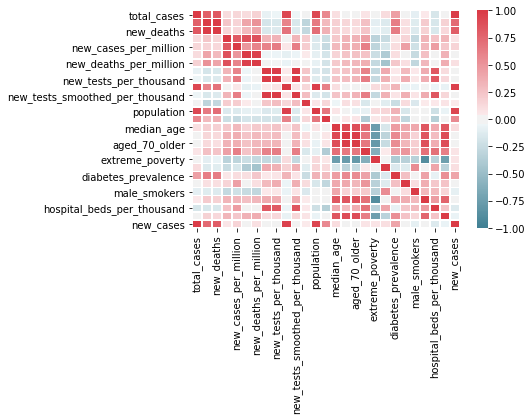

In [227]:

import seaborn as sns
import numpy as np
#ax.set_xticklabels(corre, rotation=0, fontsize=5)
#ax.set_yticklabels(corre, rotation=0, fontsize=5)
#sns.heatmap(corre,xticklabels=corre.columns,
#yticklabels=corre.columns,center=0, cmap='coolwarm', annot=False,fmt='1f')
sns.heatmap(corre, linewidths = 0.5,
            cmap = sns.diverging_palette(220, 10, as_cmap=True),
            vmin = -1, vmax = 1, annot = False)

In [95]:
TotalCasos=df.corr()['total_cases']
NuevosCasos= df.corr()['new_cases']
muertes= df.corr()['new_deaths_per_million']
Test= df.corr()['new_tests_smoothed']
poblacion= df.corr()['population']

print(TotalCasos)
print('------------------------------------------------')
print(muertes)
print('------------------------------------------------')
print(Test)
print('------------------------------------------------')
print(poblacion)
print('------------------------------------------------')
print(NuevosCasos)

total_cases                        1.000000
total_deaths                       0.790482
new_deaths                         0.843580
total_cases_per_million            0.121361
new_cases_per_million              0.146352
total_deaths_per_million           0.124893
new_deaths_per_million             0.177245
total_tests_per_thousand          -0.074093
new_tests_per_thousand            -0.039723
new_tests_smoothed                 0.927619
new_tests_smoothed_per_thousand   -0.044074
stringency_index                   0.016014
population                         0.920994
population_density                 0.575009
median_age                         0.103087
aged_65_older                      0.034361
aged_70_older                     -0.002237
gdp_per_capita                     0.074906
extreme_poverty                    0.027403
cardiovasc_death_rate              0.124386
diabetes_prevalence                0.452542
female_smokers                    -0.015326
male_smokers                    

<IPython.core.display.Javascript object>


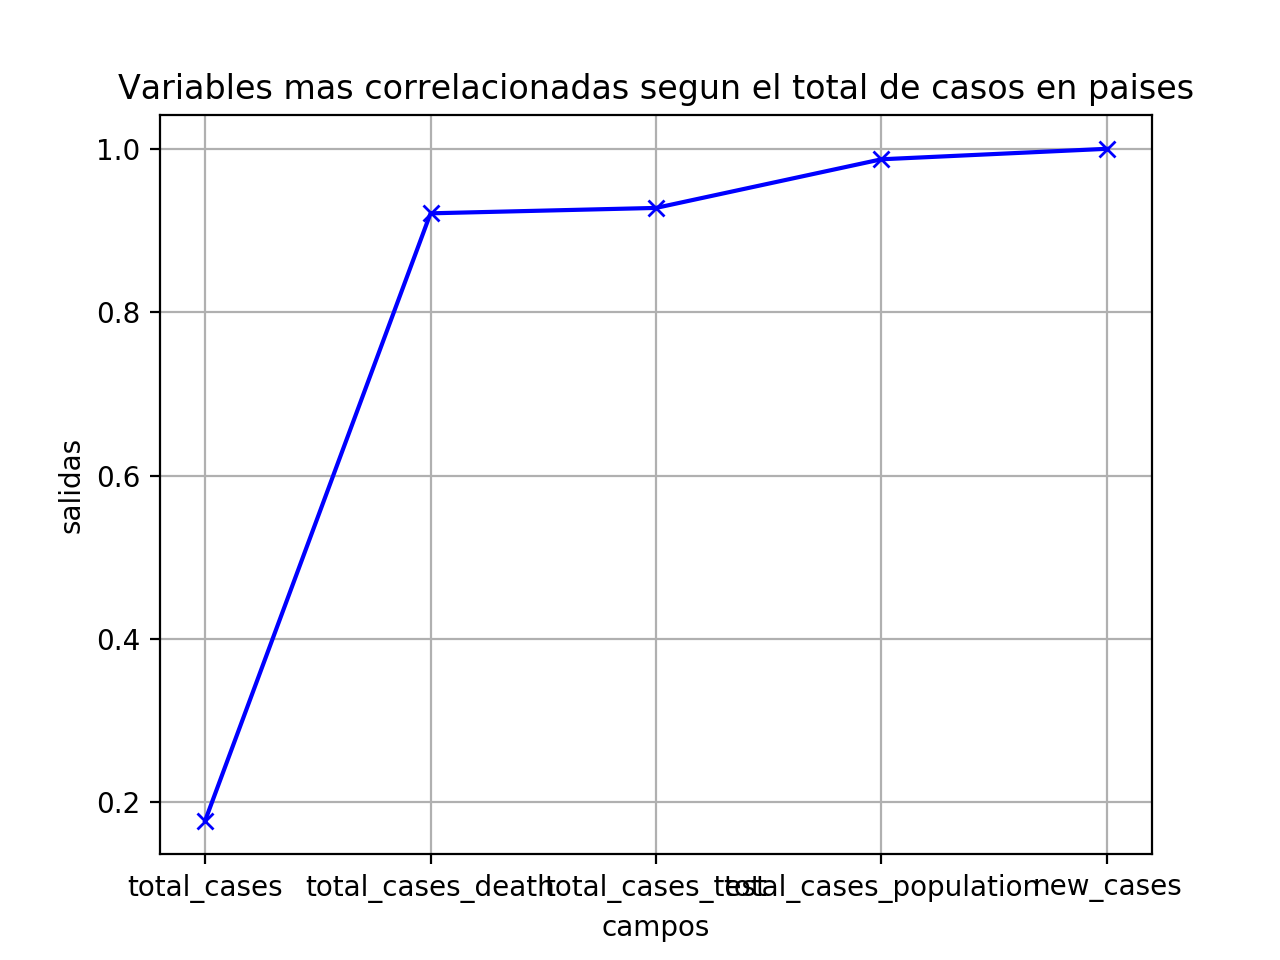

In [106]:
Totalcasos=['total_cases','total_cases_death','total_cases_test','total_cases_population','new_cases']
valores=[0.177245,0.920994,0.927619,0.987167,1.000000]
plt.plot(Totalcasos,valores, 'bx-')
plt.title("Variables mas correlacionadas segun el total de casos en paises")
plt.xlabel('campos')
plt.ylabel('salidas')
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


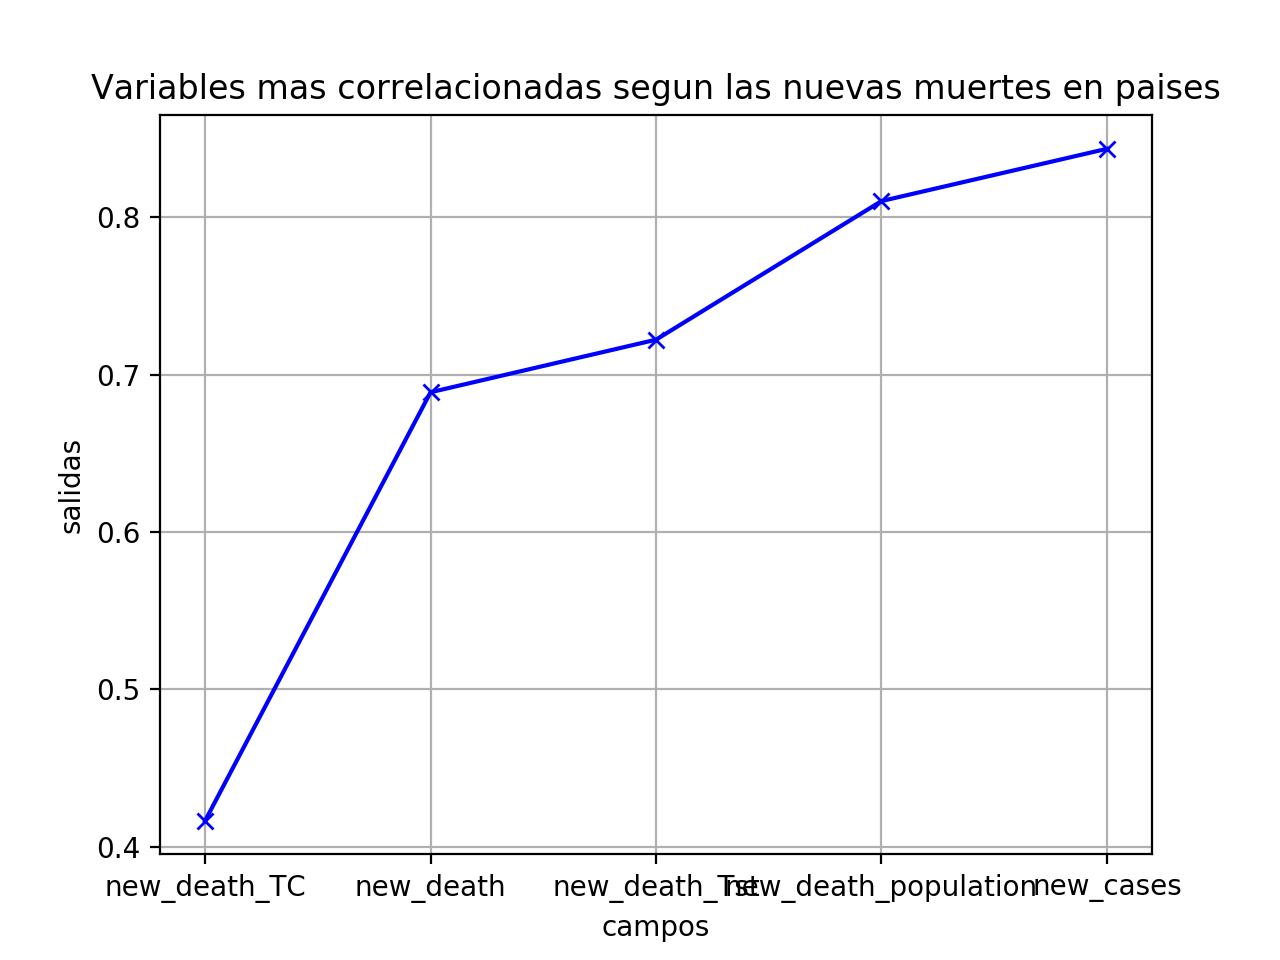

In [107]:
NuevasMuertes=['new_death_TC','new_death','new_death_Tst','new_death_population','new_cases']
valores1=[0.416424,0.688828,0.722242,0.810347,0.843580]
plt.plot(NuevasMuertes,valores1, 'bx-')
plt.title("Variables mas correlacionadas segun las nuevas muertes en paises")
plt.xlabel('campos')
plt.ylabel('salidas')
plt.grid(True)
plt.show()

<strong>Reduccion:(PCA sin #componentes)</strong>

In [120]:
# sin especificar el numero de componentes
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents)

principalDf=round(principalDf, 2)
print(principalDf)


       0     1     2     3     4     5     6     7     8     9    10    11  \
0   2.49 -0.12 -1.32  0.68 -0.80 -0.90  0.14 -1.02  0.22  0.19 -0.48  0.25   
1   2.63 -0.87 -1.84 -2.08 -0.81 -1.60 -0.29 -0.70  0.56  0.19 -0.46 -0.68   
2   3.39  0.42 -4.16  4.05 -0.72  2.54  0.32 -0.03 -0.25 -0.18 -0.10 -0.40   
3   2.41 -0.90  0.07 -0.04 -2.77 -0.02 -1.43  1.23  0.28 -0.22  0.61  0.79   
4  -3.97 -0.26 -0.53  0.76 -0.52 -0.86 -1.10 -0.15 -0.42 -0.38 -0.67  0.40   
5  -2.70 -0.77  0.37  1.11  1.01  0.25 -1.39  0.35  0.96  1.36 -0.23 -0.24   
6   0.19  9.14  3.03 -0.17 -1.26  0.15 -0.03 -0.68 -0.17  0.10  0.04 -0.18   
7  -0.53  0.20  0.26 -2.20  1.64  1.46  1.13 -0.03  0.21 -0.48 -0.31  0.47   
8   6.06 -3.68  5.57  1.28  0.90  0.16 -0.49 -0.10 -0.73 -0.09  0.07 -0.33   
9  -4.12 -1.03  0.22  1.29 -0.62  0.06  0.24 -0.94 -0.94 -0.40  0.30  0.18   
10  3.24  3.31 -2.74  0.27  3.51 -1.59 -0.61  0.62 -0.56 -0.05  0.66  0.23   
11 -1.07 -1.06 -0.66 -1.32 -0.36 -0.40  1.46 -0.08 -0.28  0.91  

In [121]:
print('Explicacion de la varianza:')
explained_variance=pca.explained_variance_ratio_
explained_variance


Explicacion de la varianza:


array([3.06393820e-01, 2.24369343e-01, 1.39438031e-01, 1.17841974e-01,
       6.09806182e-02, 4.55347699e-02, 3.16554221e-02, 2.08089878e-02,
       1.48417427e-02, 1.23729724e-02, 1.00030592e-02, 5.50530681e-03,
       3.25468529e-03, 2.72523941e-03, 1.87572483e-03, 1.20506024e-03,
       6.70378652e-04, 4.49541823e-04, 7.33228003e-05, 1.96311298e-33])

<IPython.core.display.Javascript object>


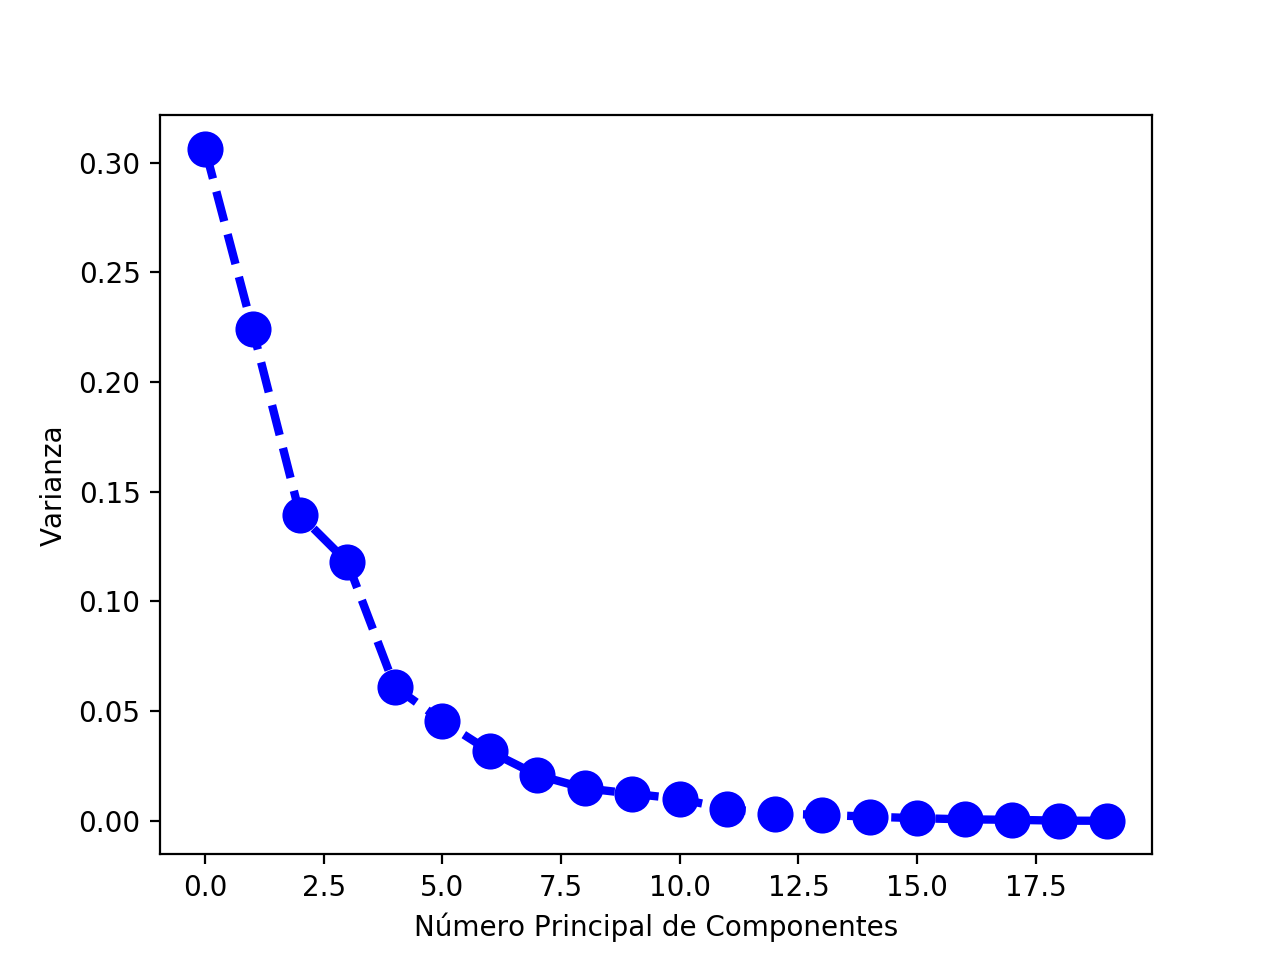

In [122]:
#explicacion de la varianza sin especificar el numero de componentes
explained_variance
#Visualize 2D Projection
import matplotlib.pyplot as plt

#plt.plot(num_pc, explained_variance)
plt.plot(explained_variance, color='blue', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12)
#plt.ylim((0,0.4))
plt.xlabel('Número Principal de Componentes')
plt.ylabel('Varianza')
plt.show()


In [15]:
# especificando el numero de componentes
from sklearn.decomposition import PCA
#num_components= 279
varianza= {}
for y in range(1,21):
    pca = PCA(y)
    principalComponents = pca.fit_transform(x)
    varianza[y] = sum(pca.explained_variance_ratio_)
#a = range(num_components)
#num_pc= a[::1]
num_cmp = []
val= []
for i , j in varianza.items():
    #print(i,j)
    num_cmp.append(i)
    val.append(j)
    
principalComponents = pca.fit_transform(x)
a = range(y)
num_pc= a[::1]
principalDf = pd.DataFrame(data = principalComponents
             , columns = num_pc)

principalDf=round(principalDf, 2)
print(principalDf)


       0     1     2     3     4     5     6     7     8     9    10    11  \
0   2.49 -0.12 -1.32  0.68 -0.80 -0.90  0.14 -1.02  0.22  0.19 -0.48  0.25   
1   2.63 -0.87 -1.84 -2.08 -0.81 -1.60 -0.29 -0.70  0.56  0.19 -0.46 -0.68   
2   3.39  0.42 -4.16  4.05 -0.72  2.54  0.32 -0.03 -0.25 -0.18 -0.10 -0.40   
3   2.41 -0.90  0.07 -0.04 -2.77 -0.02 -1.43  1.23  0.28 -0.22  0.61  0.79   
4  -3.97 -0.26 -0.53  0.76 -0.52 -0.86 -1.10 -0.15 -0.42 -0.38 -0.67  0.40   
5  -2.70 -0.77  0.37  1.11  1.01  0.25 -1.39  0.35  0.96  1.36 -0.23 -0.24   
6   0.19  9.14  3.03 -0.17 -1.26  0.15 -0.03 -0.68 -0.17  0.10  0.04 -0.18   
7  -0.53  0.20  0.26 -2.20  1.64  1.46  1.13 -0.03  0.21 -0.48 -0.31  0.47   
8   6.06 -3.68  5.57  1.28  0.90  0.16 -0.49 -0.10 -0.73 -0.09  0.07 -0.33   
9  -4.12 -1.03  0.22  1.29 -0.62  0.06  0.24 -0.94 -0.94 -0.40  0.30  0.18   
10  3.24  3.31 -2.74  0.27  3.51 -1.59 -0.61  0.62 -0.56 -0.05  0.66  0.23   
11 -1.07 -1.06 -0.66 -1.32 -0.36 -0.40  1.46 -0.08 -0.28  0.91  

In [176]:
explained_variance=pca.explained_variance_ratio_


<IPython.core.display.Javascript object>


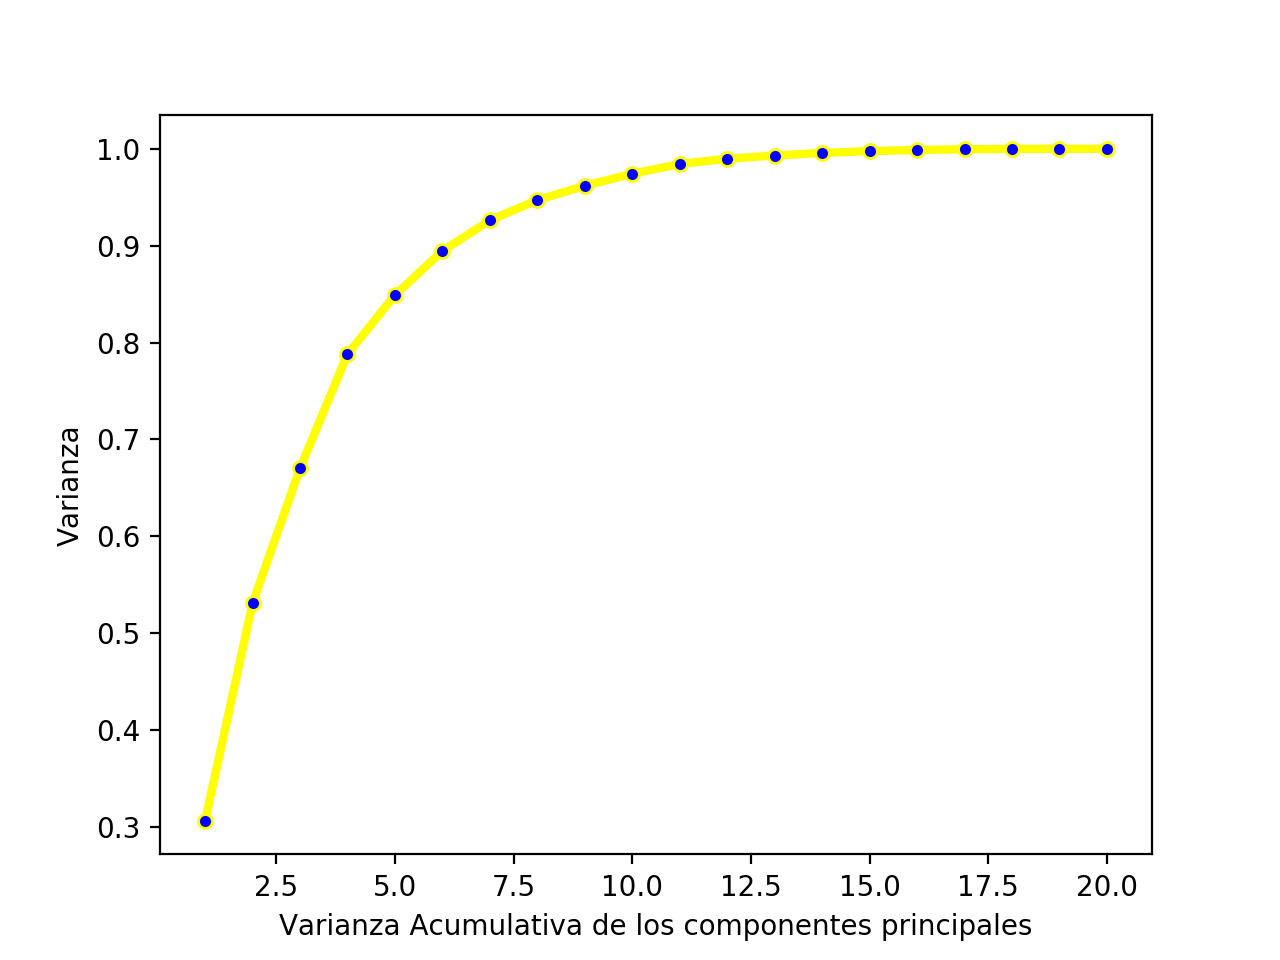

In [179]:
#Visualize 2D Projection
%matplotlib notebook
import matplotlib.pyplot as plt
plt.plot(num_cmp,val, color='yellow', linestyle='solid', linewidth = 3, 
        marker='o', markerfacecolor='blue', markersize=5  )
#plt.ylim((0,0.4))
plt.xlabel('Varianza Acumulativa de los componentes principales')
plt.ylabel('Varianza')
plt.show()


In [18]:
#PCA Projection to 2D
from sklearn.decomposition import PCA
num_components=5
pca = PCA(num_components)
principalComponents = pca.fit_transform(x)
a = range(num_components)
num_pc= a[::1]

principalDf = pd.DataFrame(data = principalComponents
             , columns = num_pc)

principalDf=round(principalDf, 2)
print(principalDf)


       0     1     2     3     4
0   2.49 -0.12 -1.32  0.68 -0.80
1   2.63 -0.87 -1.84 -2.08 -0.81
2   3.39  0.42 -4.16  4.05 -0.72
3   2.41 -0.90  0.07 -0.04 -2.77
4  -3.97 -0.26 -0.53  0.76 -0.52
5  -2.70 -0.77  0.37  1.11  1.01
6   0.19  9.14  3.03 -0.17 -1.26
7  -0.53  0.20  0.26 -2.20  1.64
8   6.06 -3.68  5.57  1.28  0.90
9  -4.12 -1.03  0.22  1.29 -0.62
10  3.24  3.31 -2.74  0.27  3.51
11 -1.07 -1.06 -0.66 -1.32 -0.36
12 -1.19 -0.65 -0.07 -0.87 -1.03
13 -1.09  1.57  1.06 -0.28  0.24
14  0.38 -1.22 -0.69 -0.99 -0.73
15  1.27 -0.48  1.35  2.71  0.34
16 -4.96 -0.51  0.32  1.24  0.85
17  1.22 -1.13 -0.36 -3.22  0.98
18  0.31 -0.50 -0.47 -3.00 -0.54
19 -3.97 -1.46  0.58  0.78  0.68


In [19]:
explained_variance=pca.explained_variance_ratio_
explained_variance


array([0.30639382, 0.22436934, 0.13943803, 0.11784197, 0.06098062])

<IPython.core.display.Javascript object>


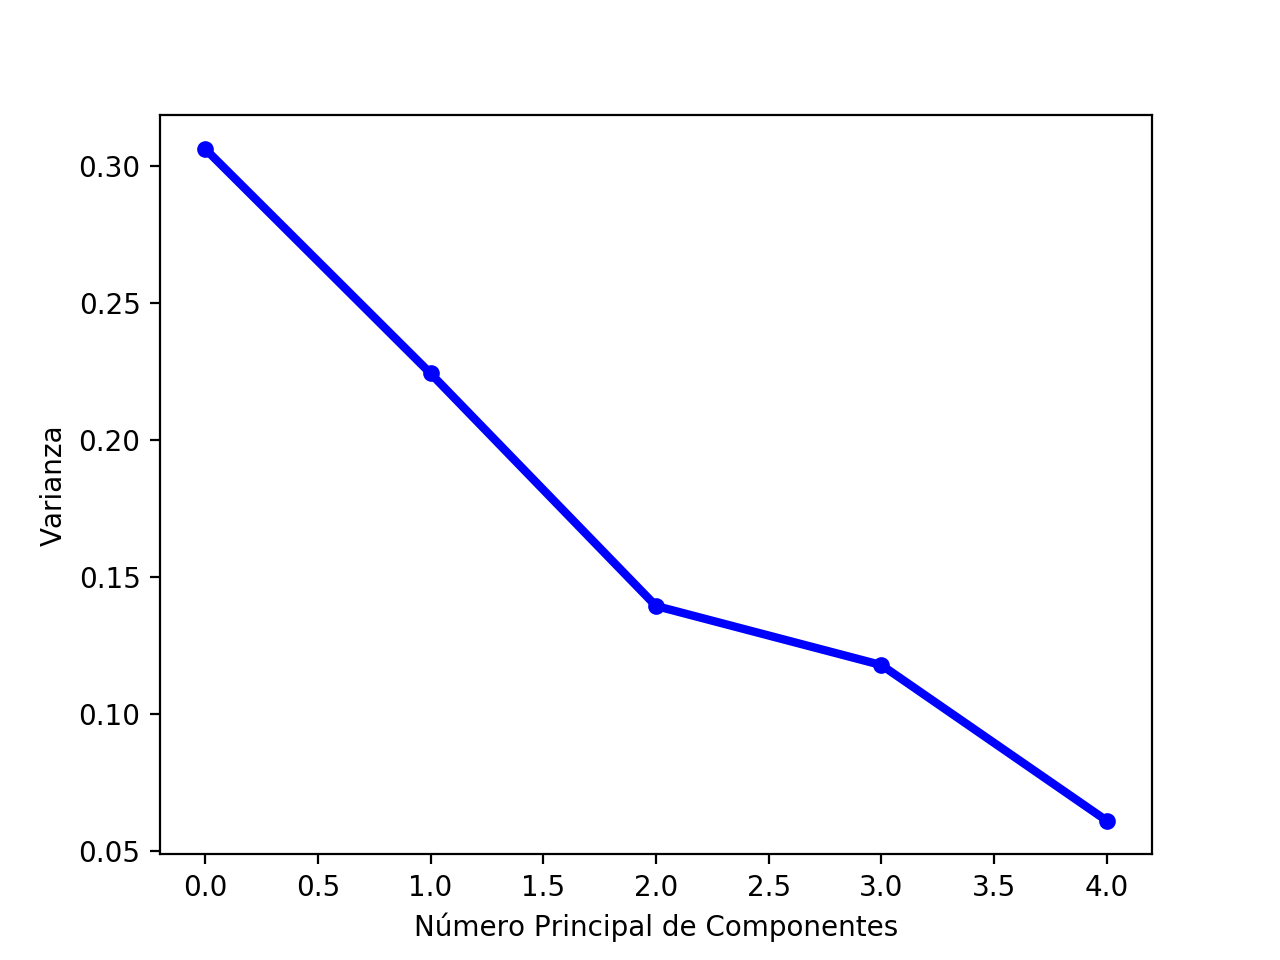

In [119]:
#explicacion de la varianza
#The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can convert 4 dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this. By using the attribute explained_variance_ratio_, you can see that the first principal component contains 72.77% of the variance and the second principal component contains 23.03% of the variance. Together, the two components contain 95.80% of the information.
explained_variance
a = range(num_components)
num_pc= a[::1]

#Visualize 2D Projection
import matplotlib.pyplot as plt

#plt.plot(num_pc, explained_variance)
plt.plot(num_pc, explained_variance, color='blue', linestyle='solid', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=5)
#plt.ylim((0,0.4))
plt.xlabel('Número Principal de Componentes')
plt.ylabel('Varianza')
plt.show()

In [21]:
corre = principalDf.corr()
corre


,0,1,2,3,4
0,1.000000,-0.000054,0.000584,0.000051,-0.000175
1,-0.000054,1.000000,-0.000111,0.000831,-0.000052
2,0.000584,-0.000111,1.000000,0.000989,-0.000824
3,0.000051,0.000831,0.000989,1.000000,-0.000773
4,-0.000175,-0.000052,-0.000824,-0.000773,1.000000


In [22]:
#PREPROCESAMIENTO
X = df.drop('new_cases_per_million', 1)  
y = df['new_cases_per_million']


In [23]:
# Splitting dataset en conjunto de training y conjunto de Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_test)


(16, 26)
(4, 26)
(16,)
(4,)
    total_cases  total_deaths  new_deaths  total_cases_per_million  \
19    -0.584594     -0.535492   -0.515978                -0.799690   
2     -0.556369     -0.530934   -0.511726                -0.102276   
20    -0.577911     -0.531692   -0.510491                -0.725757   
9     -0.318331     -0.499857   -0.462374                 0.805978   

    total_deaths_per_million  new_deaths_per_million  \
19                 -0.431188               -0.543585   
2                  -0.375871               -0.463413   
20                 -0.415384               -0.508144   
9                  -0.313878               -0.269157   

    total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  \
19                 -0.576886               -0.518395           -0.263017   
2                  -0.250618               -0.234281           -0.415607   
20                 -0.446241               -0.522719           -0.412103   
9                   3.952723        

In [24]:
#TRANSFORMACION MEDIANTE ESTANDARIZACION DE DATOS
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  


<strong>Regresion Lineal Multiple</strong>

In [108]:
import statsmodels.api as sm           ## Este proporciona funciones para la estimación de muchos modelos estadísticos
import statsmodels.formula.api as smf
mod = smf.ols('new_cases ~ total_cases + new_tests_smoothed + population + new_deaths',  data=df).fit()
print(mod.summary())


                            OLS Regression Results                            
Dep. Variable:              new_cases   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     410.4
Date:                Fri, 31 Jul 2020   Prob (F-statistic):           4.00e-15
Time:                        09:42:42   Log-Likelihood:                 18.249
No. Observations:                  20   AIC:                            -26.50
Df Residuals:                      15   BIC:                            -21.52
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.0055      0

In [109]:
print('Extraccion Estimados β: ')
mod.params= round(mod.params,5)
mod.params


Extraccion Estimados β: 


Intercept            -0.00549
total_cases           0.66711
new_tests_smoothed    0.49999
population           -0.19879
new_deaths            0.04735
dtype: float64

In [110]:
print('Extraccion Estimado final de nuevos casos σ2: ')
mod.mse_resid


Extraccion Estimado final de nuevos casos σ2: 


0.01258700188347222

<IPython.core.display.Javascript object>


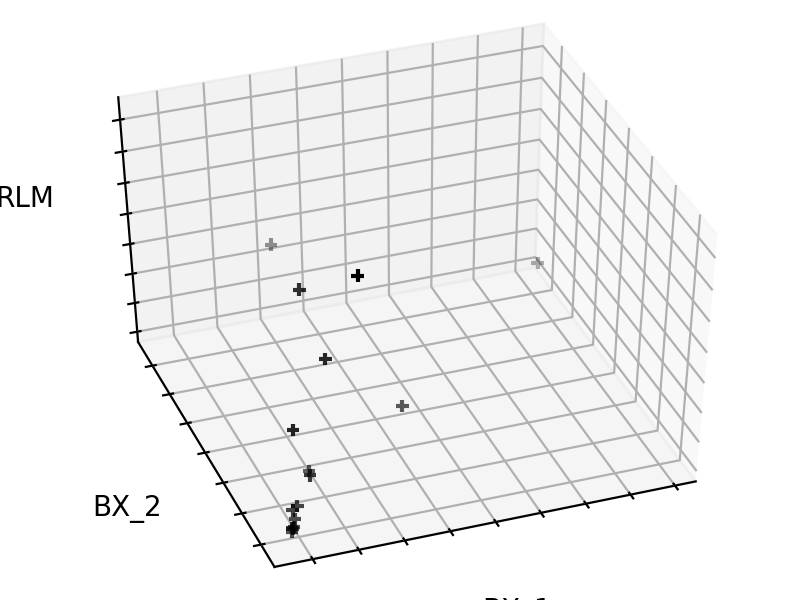

<IPython.core.display.Javascript object>


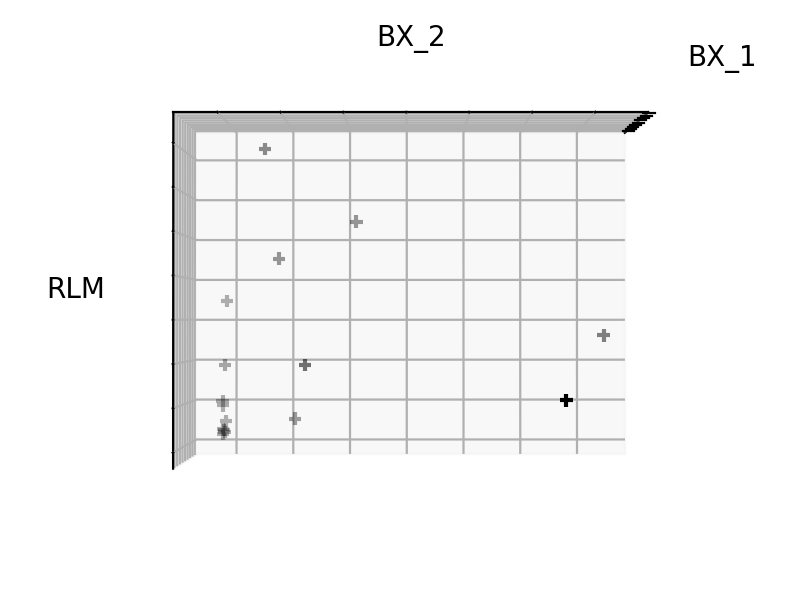

<IPython.core.display.Javascript object>


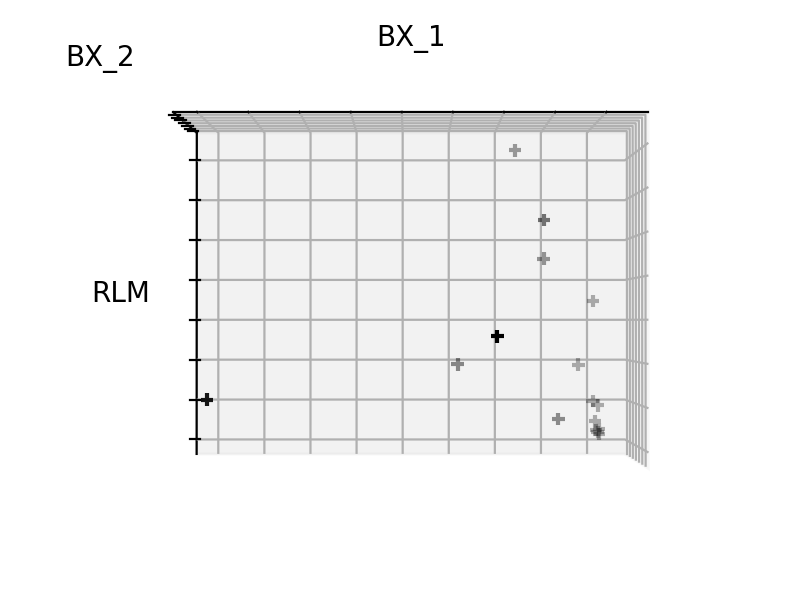

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

from sklearn import datasets, linear_model
ols = linear_model.LinearRegression()
ols.fit(X_train, y_train)


# #############################################################################
# Traza la figura
def plot_figs(fig_num, elev, azim, X_train, clf):
    fig = plt.figure(fig_num, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, elev=elev, azim=azim)

    ax.scatter(X_train[:, 0], X_train[:, 1], y_train, c='k', marker='+')
    ax.set_xlabel('BX_1')
    ax.set_ylabel('BX_2')
    ax.set_zlabel('RLM')
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])

# Generar las tres diferentes figuras desde distintas perspectivas
elev = 43.5
azim = -110
plot_figs(1, elev, azim, X_train, ols)

elev = -.5
azim = 0
plot_figs(2, elev, azim, X_train, ols)

elev = -.5
azim = 90
plot_figs(3, elev, azim, X_train, ols)
plt.show()



In [28]:
#Extracción de Datos
import pandas as pd
import numpy as np
import math
from scipy import sparse
from sklearn.preprocessing import StandardScaler
import math
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
x=df
x = StandardScaler().fit_transform(x)


<strong>Clustering</strong>

In [29]:
#Datamining: Clustering (método no supervisado de Machine Learning)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

from sklearn.cluster import KMeans
nclust = 8

#Kmeans Clustering 
def descubrirK(X, nclust):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = descubrirK(x, nclust)
kmeans = pd.DataFrame(clust_labels)
kmeans


,0
0,1
1,1
2,4
3,1
4,2
5,2
6,3
7,5
8,6
9,2


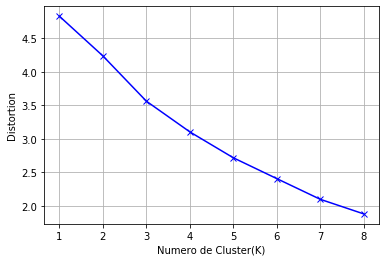

In [237]:
import matplotlib.pyplot as plt
%matplotlib inline
distortions = []
X = x
K = range(1,9)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('Numero de Cluster(K)')
plt.ylabel('Distortion')
plt.grid(True)
plt.show()


<strong>Tiempo de Ejecucion(Seg)</strong>

In [31]:
from time import time
import csv
#Datamining: Clustering (método no supervisado de Machine Learning)
#Sin Reducir Dimensionalidad: 
#Desventajas
#    a. Más costo computacional y mayor uso de memoria.
#    b. No se pueden visualizar fácilemnte los grupos de los usuarios por la alta dimensionalidad.

tiempo_inicial = time()
clust_labels, cent = descubrirK(df, nclust)
kmeans = pd.DataFrame(clust_labels)
df['salida'] = kmeans
tiempo_final = time()
tiempo_ejecucion = tiempo_final - tiempo_inicial
print (tiempo_ejecucion)


0.0778200626373291


<IPython.core.display.Javascript object>


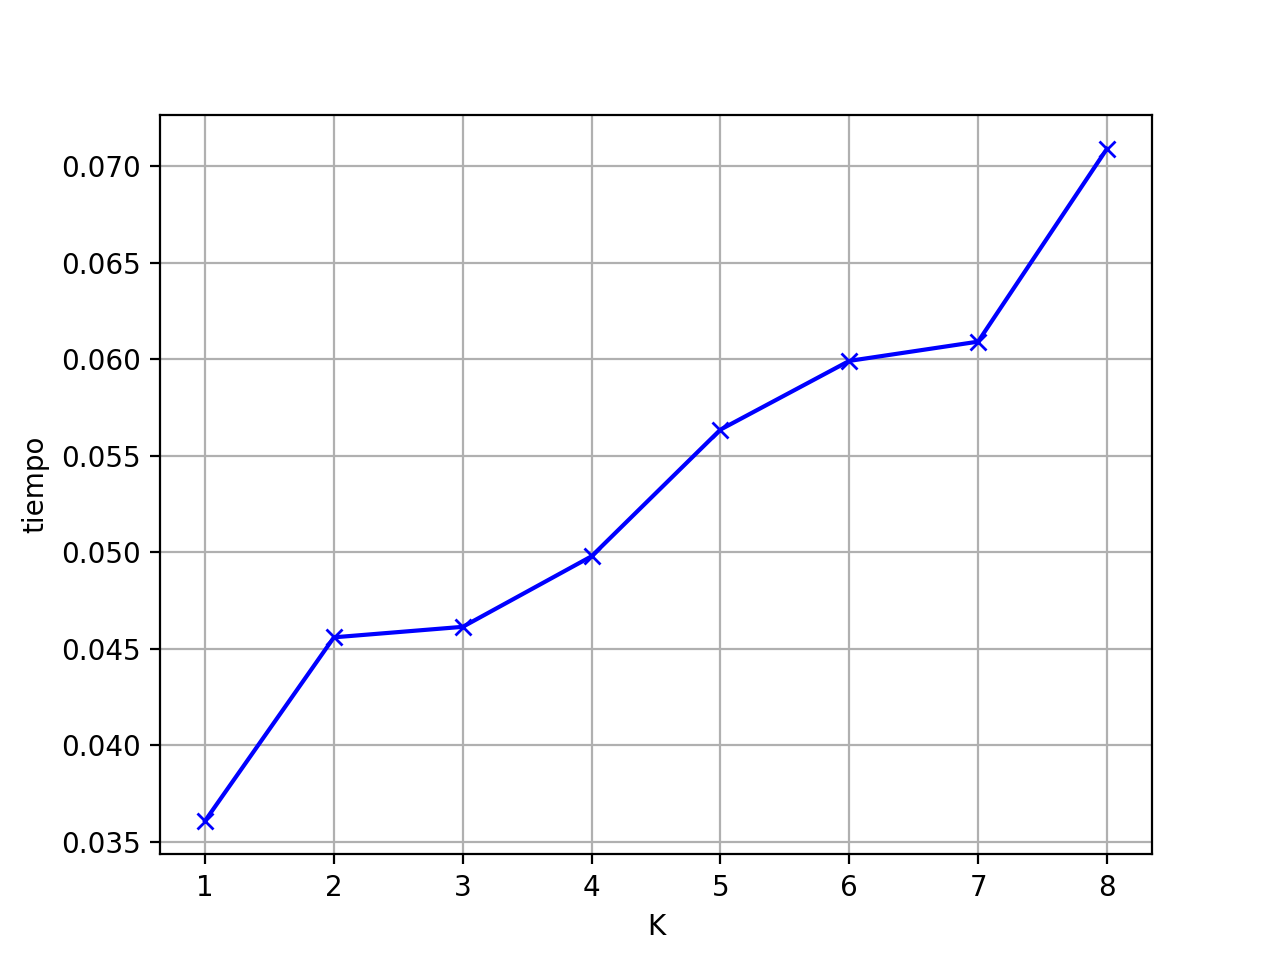

In [124]:
cluster=[1,2,3,4,5,6,7,8]
tiempo=[0.03609013557434082,0.04559588432312012,0.04613995552062988,0.04979515075683594,0.056356191635131836,0.05991721153259277,0.06091499328613281,0.07090616226196289
]
plt.plot(cluster, tiempo, 'bx-')
plt.xlabel('K')
plt.ylabel('tiempo')
plt.grid(True)
plt.show()

<strong>Visualizacion 3D y 2D</strong>

Text(0.5, 0, '3ER FACTOR')

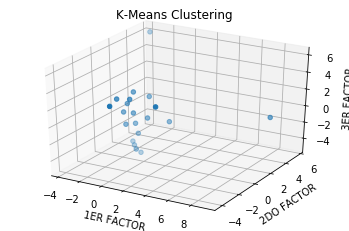

In [239]:
#Visualización de grupos de usuarios en 3D
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(-5, 5, 11)
xline = np.linspace(0, 10, 11)
yline = np.linspace(0, 15, 11)
#ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = principalDf[0]
xdata = principalDf[1]
ydata = principalDf[2]
#ax.scatter3D(xdata, ydata, zdata, c=zdata);
ax.scatter3D(xdata, ydata, zdata);
ax.set_title('K-Means Clustering')
ax.set_xlabel('1ER FACTOR')
ax.set_ylabel('2DO FACTOR')
ax.set_zlabel('3ER FACTOR')


<IPython.core.display.Javascript object>


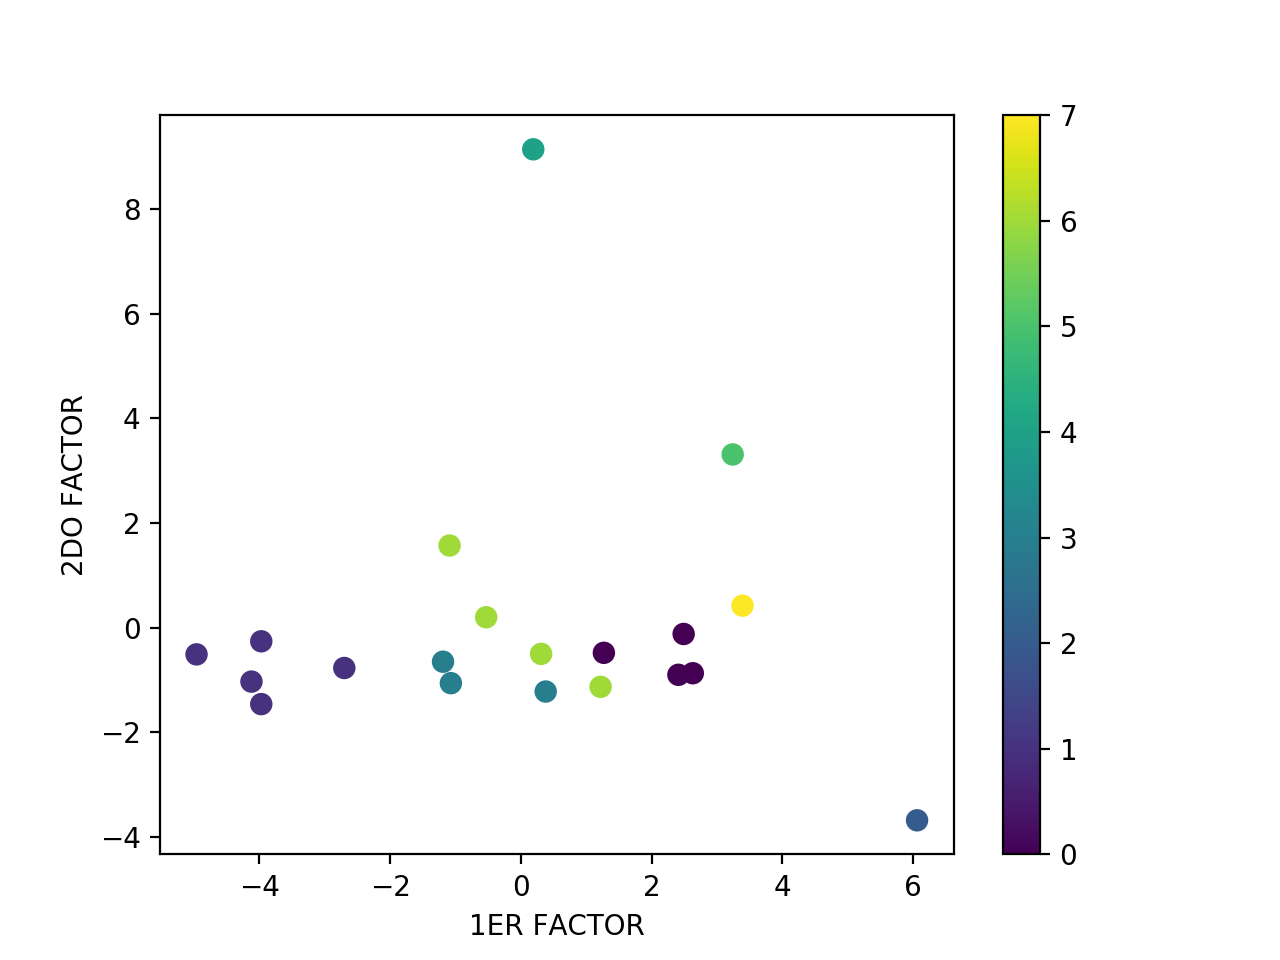

In [173]:
#Visualización de grupos de usuarios en 2D
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(principalDf[0],principalDf[1],
                     c=kmeans[0],s=50)
ax.set_xlabel('1ER FACTOR')
ax.set_ylabel('2DO FACTOR')
plt.colorbar(scatter)
